# Notebook setup

This notebook needs numpy, matplotlib and scikit-learn. Make sure the kernel is the Python interpreter you want to use.

Run the next cell to install the required packages into the current kernel, then use "Kernel → Restart & Run All" if asked.

In [ ]:
import sys
import subprocess

packages = ["numpy", "matplotlib", "scikit-learn", "jupyter"]
for pkg in packages:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", pkg])
print("Installed/updated packages:", packages)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs , make_circles

In [ ]:
X , y = make_blobs(n_samples=1000, n_features=2, centers = 2 , random_state = 0)
#X , y = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=1)

y= y.reshape(y.shape[0],1)

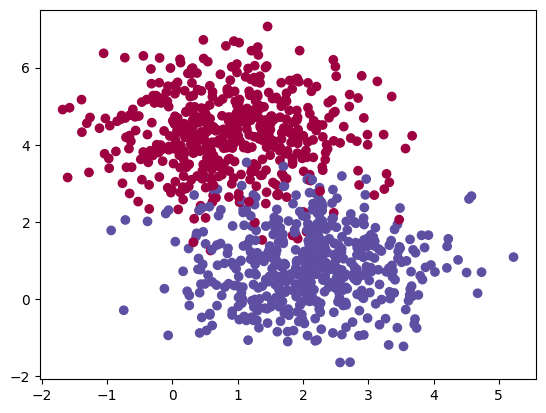

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Spectral)
plt.show()

In [ ]:
def parameters(x):
    W = np.random.randn(x.shape[1], 1)
    b = np.zeros((1,))
    return W, b


def G(X, theta, b):
    Z = X.dot(theta) + b
    return 1 / (1 + np.exp(-Z))


def cost_function(X, y, w, b):
    m = X.shape[0]
    y = y.reshape(-1, 1)
    h = G(X, w, b)
    eps = 1e-15
    h = np.clip(h, eps, 1 - eps)
    J = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

# initialize using the dataset created earlier (make_blobs)
w, b = parameters(X)
print("Initial cost: ", cost_function(X, y, w, b))


Initial cost:  0.7244224611835661


In [ ]:
def gradient(X , y , theta , b):
	m = len(X)
	dj_dtheta = 1/m * X.T.dot(G(X, theta, b) - y)
	dj_db = 1/m * np.sum(G(X, theta, b) - y)
	return dj_dtheta, dj_db

In [ ]:
theta, b = parameters(X)

In [ ]:
def gradient_descent(X, y, theta, b, alpha=0.1, iterations=2000):
    m = X.shape[0]
    J_history = []
    for i in range(iterations):
        dj_dtheta, dj_db = gradient(X, y, theta, b)
        theta = theta - alpha * dj_dtheta
        b = b - alpha * dj_db
        if i % 200 == 0:
            J_history.append(cost_function(X, y, theta, b))
            # optional progress print
            print(f"Iteration {i}: cost = {J_history[-1]:.6f}")
    return theta, b, J_history


In [ ]:
theta, b = parameters(X)
theta, b, J_history = gradient_descent(X, y, theta, b, alpha=0.1, iterations=3000)
print("Final cost:", cost_function(X, y, theta, b))


In [ ]:
theta